# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from seaborn import load_dataset

%matplotlib inline

In [2]:
# Carregando os dados e criando as variáveis
tips = sns.load_dataset(('tips'))
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           1.52e-06
Time:                        16:46:02   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

(0.0, 0.505398619388979)

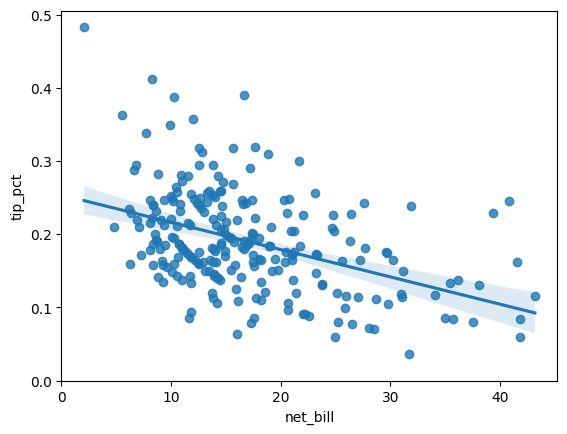

In [3]:
# Modelo tip_pct x net_bill
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()
print(reg_tip_pct.summary())

sns.regplot(
    data=tips[tips['tip_pct']<.5],
    x='net_bill',
    y='tip_pct'
)

plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           1.62e-13
Time:                        16:46:46   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

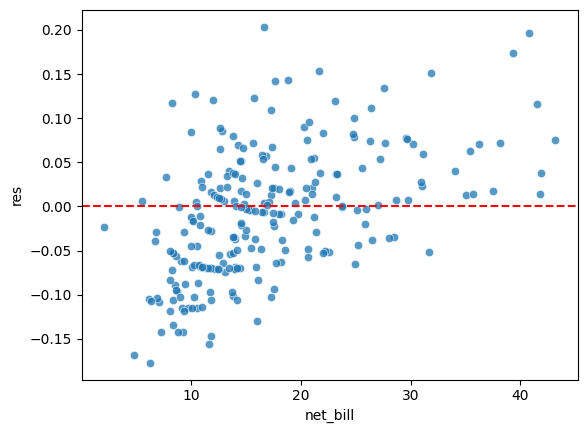

In [5]:
reg_tip_pct = smf.ols('tip_pct ~ np.log(net_bill)', data=tips).fit()
print(reg_tip_pct.summary())

tips['res'] = reg_tip_pct.resid

sns.scatterplot(
    data=tips[tips['tip_pct'] < .5],
    x='net_bill',
    y='res',
    alpha=.75
)

plt.axhline(y=0, color='r', linestyle='--')

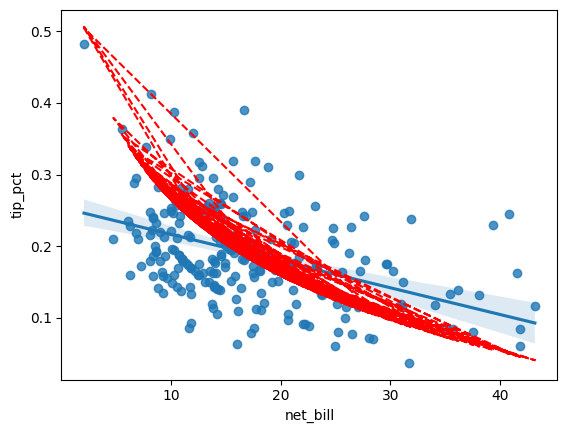

In [10]:
plt.close('all')

sns.regplot(x='net_bill', y='tip_pct', data=tips[tips['tip_pct'] < .5])
plt.plot(tips['net_bill'], reg_tip_pct.fittedvalues, 'r,--')

In [11]:
tips['pred'] = reg_tip_pct.fittedvalues

r = tips[['pred', 'tip_pct']].corr().iloc[0, 1]
r

0.44914234088544225

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     13.48
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           0.000297
Time:                        16:48:01   Log-Likelihood:                 102.94
No. Observations:                 244   AIC:                            -201.9
Df Residuals:                     242   BIC:                            -194.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.23

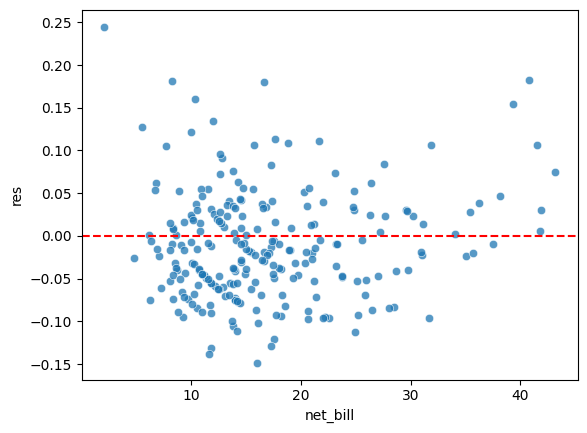

In [12]:
plt.close('all')

reg_tip_pct = smf.ols('tip_pct ~ np.power(net_bill, 2)', data=tips).fit()
print(reg_tip_pct.summary())

tips['res'] = reg_tip_pct.resid

sns.scatterplot(
    data=tips[tips['tip_pct'] < .5],
    x='net_bill',
    y='res',
    alpha=.75
)

plt.axhline(y=0, color='r', linestyle='--')

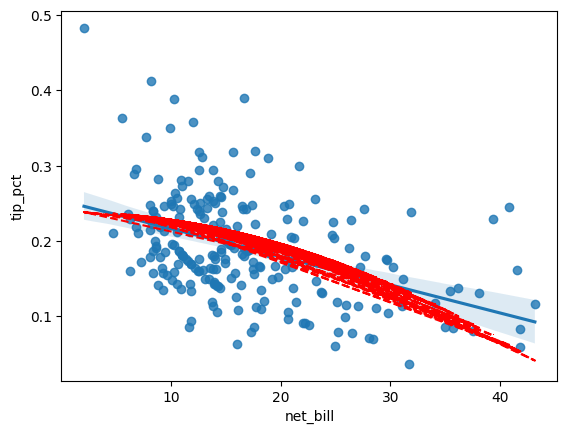

In [13]:
plt.close('all')

sns.regplot(x='net_bill', y='tip_pct', data=tips[tips['tip_pct'] < .5])
plt.plot(tips['net_bill'], reg_tip_pct.fittedvalues, 'r,--')

In [14]:
tips['pred'] = reg_tip_pct.fittedvalues

r = tips[['pred', 'tip_pct']].corr().iloc[0, 1]
r

0.22971434805042354

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                             OLS Regression Results                             
Dep. Variable:     np.log(tip_pct + .1)   R-squared:                       0.213
Model:                              OLS   Adj. R-squared:                  0.209
Method:                   Least Squares   F-statistic:                     65.35
Date:                  Thu, 20 Oct 2022   Prob (F-statistic):           3.00e-14
Time:                          16:49:23   Log-Likelihood:                -7.1139
No. Observations:                   244   AIC:                             18.23
Df Residuals:                       242   BIC:                             25.22
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9782      0.037

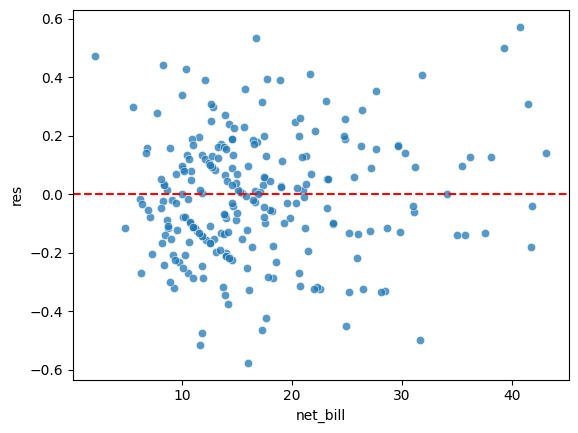

In [21]:
plt.close('all')

# ajustando uma função logaritmica de y

reg_tip_pct = smf.ols('np.log(tip_pct + .1) ~ net_bill', data=tips).fit()
print(reg_tip_pct.summary())

tips['res'] = reg_tip_pct.resid

sns.scatterplot(
    data=tips[tips['tip_pct'] < .5],
    x='net_bill',
    y='res',
    alpha=.75
)

plt.axhline(y=0, color='r', linestyle='--')

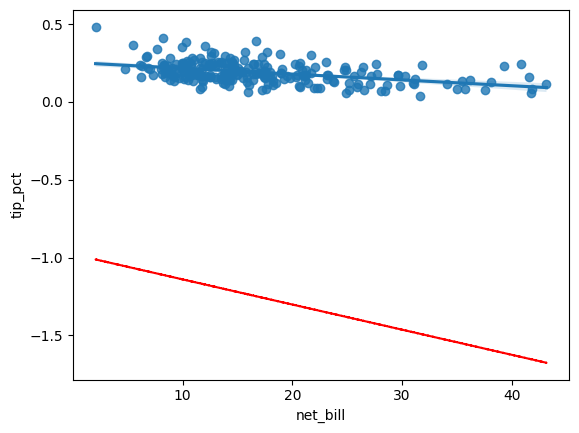

In [22]:
plt.close('all')

sns.regplot(x='net_bill', y='tip_pct', data=tips[tips['tip_pct'] < .5])
plt.plot(tips['net_bill'], reg_tip_pct.fittedvalues, 'r,--')

In [23]:
tips['pred'] = reg_tip_pct.fittedvalues

r = tips[['pred', 'tip_pct']].corr().iloc[0, 1]
r

0.3021437558623867

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                             OLS Regression Results                             
Dep. Variable:     np.log(tip_pct + .1)   R-squared:                       0.295
Model:                              OLS   Adj. R-squared:                  0.292
Method:                   Least Squares   F-statistic:                     101.1
Date:                  Thu, 20 Oct 2022   Prob (F-statistic):           4.21e-20
Time:                          16:50:02   Log-Likelihood:                 6.3140
No. Observations:                   244   AIC:                            -8.628
Df Residuals:                       242   BIC:                            -1.634
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

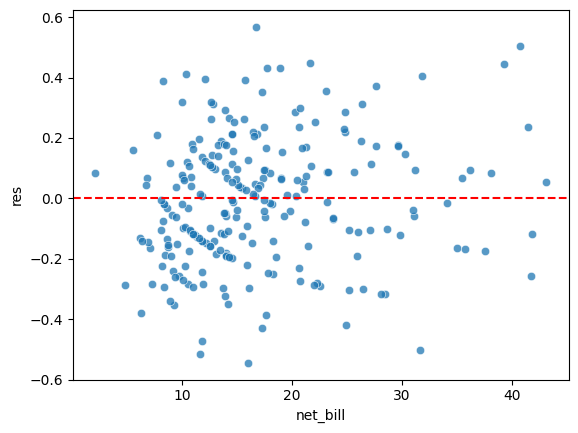

In [25]:
plt.close('all')

# ajustando log em Y e log em X

reg_tip_pct = smf.ols('np.log(tip_pct + .1) ~ np.log(net_bill + .1)', data=tips).fit()
print(reg_tip_pct.summary())

tips['res'] = reg_tip_pct.resid

sns.scatterplot(
    data=tips[tips['tip_pct'] < .5],
    x='net_bill',
    y='res',
    alpha=.75
)

plt.axhline(y=0, color='r', linestyle='--')

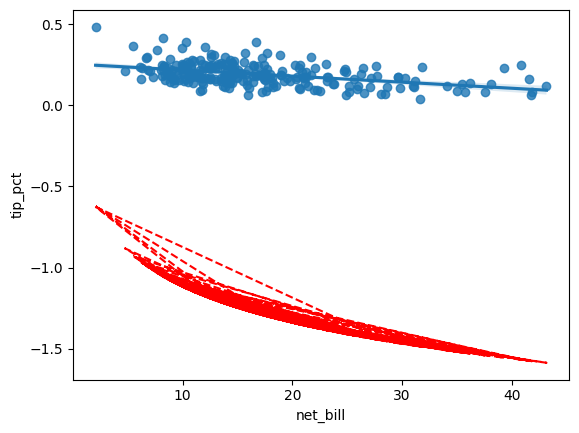

In [28]:
plt.close('all')

sns.regplot(x='net_bill', y='tip_pct', data=tips[tips['tip_pct'] < .5])
plt.plot(tips['net_bill'], reg_tip_pct.fittedvalues, 'r,--')

In [31]:
tips['pred'] = reg_tip_pct.fittedvalues

r = tips[['pred', 'tip_pct']].corr().iloc[0, 1]
r

0.44645109639929226

###  6. qual modelo resultou no melhor ajuste?

Se todas as execuções estiverem corretas, o melhor resultado foi o log em Y e log em X.